# RAPPORT ARF
### de Toldi Melchior, de Bézenac Emmanuel

## Introduction

Nous aborderons dans ce rapport différents modèles de classification binaire supervisés appliqués sur des données générées artificiellement, et discuterons de leurs résultats. 
   
Nous traiterons les modèles suivants:
* Naive Bayes
* Arbres de décision
* K-nearest neighbors
* Perceptron
* Réseau de neurones

Pour finir, nous appliquerons ces modèles sur un cas d'usage pour tenter de prédire les survivants du naufrage du Titanic.

## Données Artificielles:

   Afin d'observer le comportement des modèles au cours de la phase d'apprentissage et de prédiction, nous avons souhaité utiliser des données bidimensionnelles générés artificiellement. De cette manière, nous pouvons interpréter facilement les résultats, et voir comment se comportent les modèles dans des situations différentes (données linéairement séparables, ou non, par exemple).

   En pratique, la dimension des données est supérieure à 2, mais nous pouvons néenmoins tenter d'inférer certains spécificités de fonctionnement des modèles sur ces données analogues avec une dimension supérieure.
   
### Chargement et Affichage>

In [1]:
import arftools as arf
import numpy as np
import models
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Mélange de 2 gaussiennes

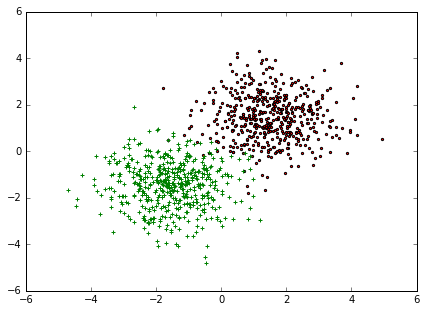

In [2]:
x_twogauss,y_twogauss=arf.load_csv('two_gaussians')
arf.plot_data(x_twogauss,y_twogauss)

#### Mélange de 4 gaussiennes

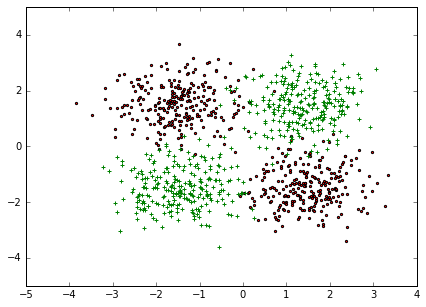

In [3]:
x_fourgauss,y_fourgauss=arf.load_csv('four_gaussians')
arf.plot_data(x_fourgauss,y_fourgauss)

#### Frontière hyperbolique

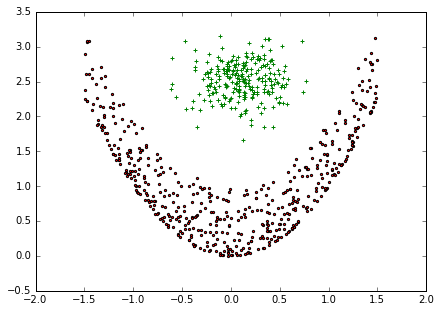

In [4]:
x_hyp,y_hyp=arf.load_csv('hyperbolic2')
arf.plot_data(x_hyp,y_hyp)

#### Frontière concentrique

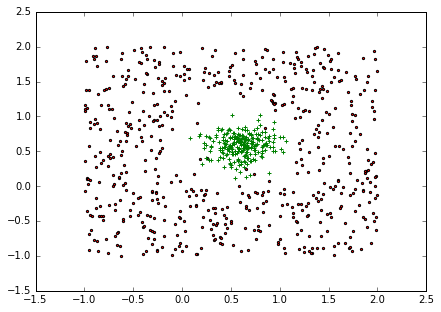

In [5]:
x_conc,y_conc=arf.load_csv('concentric2')
arf.plot_data(x_conc,y_conc)

#### Échequier

[[ 0.79420628  3.76177605]
 [-0.74451093  2.65672699]
 [-1.44745629 -0.18584975]
 [ 3.1329269   1.17929494]
 [ 3.94793738 -1.85102115]
 [ 2.18901456 -3.90488153]
 [ 0.07352366  1.64310753]
 [-1.53652732 -3.7514969 ]
 [-0.67849309 -3.12717777]
 [-1.53562804  1.52163355]
 [-0.84802371 -0.05161031]
 [-1.83849849  2.38319098]
 [-2.81217258  2.17203274]
 [ 1.69394474 -3.08908051]
 [-2.80938227  0.76333016]
 [ 3.20349285  3.56066805]
 [-1.63113283  3.32582977]
 [ 0.24971608 -1.09083886]
 [ 1.24004762 -2.81926731]
 [-3.2798229   2.67495961]]
[ 1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1.
 -1. -1.]


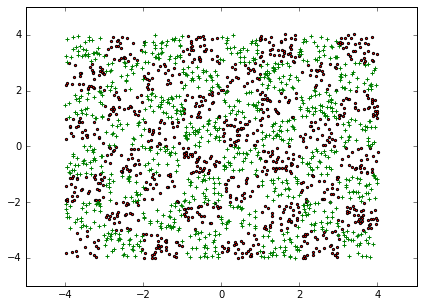

In [6]:
x_ech,y_ech=arf.load_csv('echequier')
arf.plot_data(x_ech,y_ech)
print x_ech[:20]
print y_ech[:20]

## Résultats/Interprétation

score, 

frontiere de décision

plots des scores avec la modification des hyperparamètres

### Naive Bayes

In [7]:
nb=models.Bayes()

### Arbres de décision

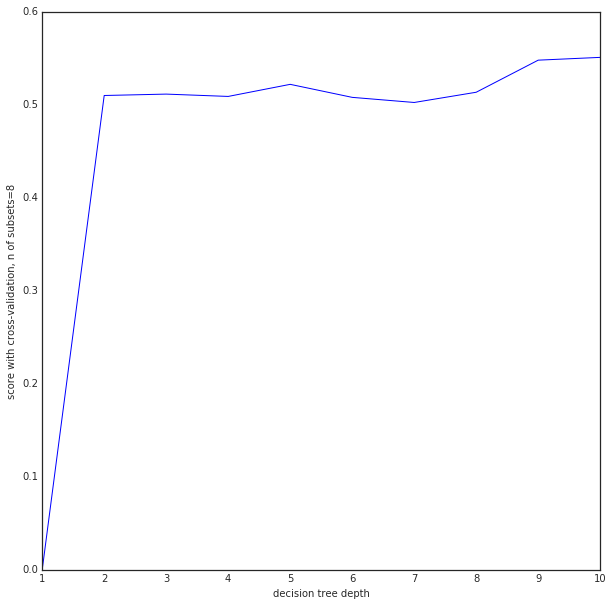

In [19]:
dt=models.DecisionTree()
max_depth=10
plt.figure(figsize=(10,10))
dt_score=np.zeros((max_depth))
for depth in range(1,max_depth):
    dt.max_depth=depth
    dt_score[depth]=models.cross_validation(dt,x_ech,models.mod_labels(y_ech,'0,1'),8)
plt.plot(range(1,max_depth+1),dt_score,label='Decision Tree cross-val score')
plt.ylabel('score with cross-validation, n of subsets=8')
plt.xlabel('decision tree depth')
plt.show()

### K-nearest neighbors

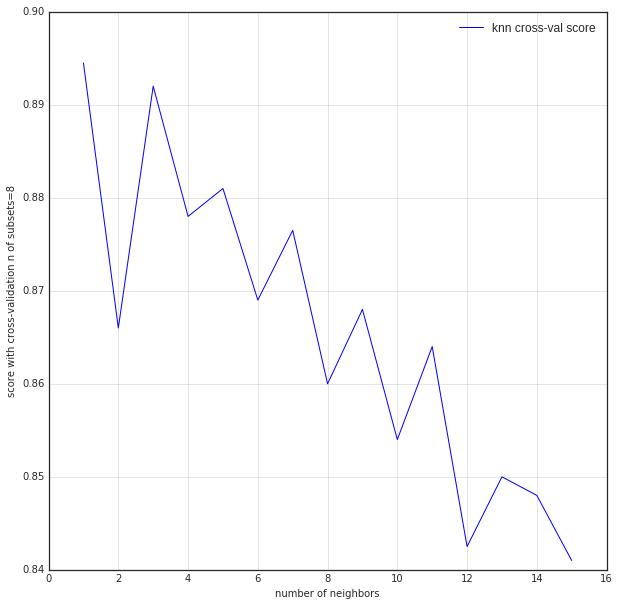

In [16]:
knn=models.KNN()
#knn.hyperparam_plot(datax,datay)
from matplotlib import style
plt.style.use('seaborn-white')

param_range=range(1,15+1)
plt.figure(figsize=(10,10))
knn_score=np.zeros((len(param_range)))
for k in range(1,len(param_range)+1):
    knn=models.KNN(k=k)
    knn_score[k-1]=models.cross_validation(knn,x_ech,models.mod_labels(y_ech,'0,1'),8)

plt.plot(param_range,knn_score,label='knn cross-val score')
plt.ylabel('score with cross-validation n of subsets=8')
plt.xlabel('number of neighbors')
plt.grid()
plt.legend()
plt.show()    

In [13]:
print param_range


[1, 2]


### Perceptron

In [10]:
perc=models.Perceptron()

### Perceptron multi couches

In [11]:
nn=models.NN(layers=[2,2,1],eps=0.1,max_iter=100000)

### Scores: Récapitulatif

In [2]:
dataset=['two_gaussians','four_gaussians','hyperbolic2','concentric2','echequier']
results=[]
for data in dataset:
    d={}
    x,y1=arf.load_csv(data)
    y2=models.mod_labels(y1,mod='0,1')
    
    bayes=models.Bayes()
    d['Naive Bayes']=models.cross_validation(bayes,x,y1,8)
    
    dt=models.DecisionTree()
    dt.maxdepth=4
    d['DecisionTree']=models.cross_validation(dt,x,y2,8)
    
    knn=models.KNN(k=3)
    d['KNN']=models.cross_validation(knn,x,y2,8)
    
    perc=models.Perceptron()
    d['Perceptron']=models.cross_validation(perc,x,y1,8)
    print(data)
    results.append(d)    
    
df=pd.DataFrame(results,index=dataset)
df

two_gaussians
four_gaussians
hyperbolic2
concentric2
echequier


/home/emmanuel/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/emmanuel/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


,DecisionTree,KNN,Naive Bayes,Perceptron
two_gaussians,0.475000,0.981000,0,0.254816
four_gaussians,0.465000,0.949000,0,0.249264
hyperbolic2,0.666667,1.000000,0,0.071058
concentric2,0.702381,0.988095,0,0.056973
echequier,0.509500,0.891500,0,0.250720


## Use case: données du Titanic

Présentation rapide. D'ou viennet les données?
Explication du pre-processing, etc


Nous utilisons les données proposés par le site kaggle.com, disponibles à partir du lieu suivant:

https://www.kaggle.com/c/titanic/data

Nous avons effectué un pre-processing, où nous avons  les données pour l'analyse suivante. 
### Données

In [2]:
path='data/'
train_df=pd.read_csv(path+'final_train.csv',index_col=False)
test_df=pd.read_csv(path+'final_test.csv')
datax=train_df[['Pclass','Age','Parch','Fare','Embarked','Gender']].values
datay=train_df['Survived'].values
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22,1,0,7.2500,2,1
1,1,1,38,1,0,71.2833,0,0
2,1,3,26,0,0,7.9250,2,0
3,1,1,35,1,0,53.1000,2,0
4,0,3,35,0,0,8.0500,2,1


### Pour aller plus loin

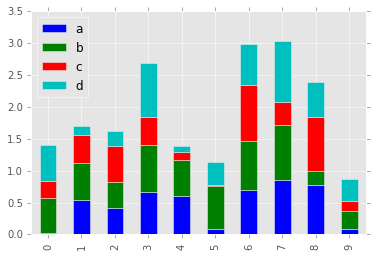

In [12]:
import matplotlib
matplotlib.style.use('ggplot')

df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot(kind='bar',stacked=True)